<a href="https://colab.research.google.com/github/EAakiyama3104/python_lecture/blob/master/_%5BPython%E8%AC%9B%E5%BA%A7%5D%E7%AC%AC4%E5%9B%9E%E6%AD%8C%E8%A9%9E%E3%82%B5%E3%82%A4%E3%83%88%E3%81%AE%E3%82%B9%E3%82%AF%E3%83%AC%E3%82%A4%E3%83%94%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Webスクレイピングとは


* Webサイトから情報を取得する技術
* APIを公開していないサイトの情報も取得できる
* HTMLを読み込んで、必要な情報を抜き出す必要がある

手順


1. HTTPリクエストを送り、HTMLのレスポンスを取得
2. HTMLの中身を見て、必要な情報がある場所を確認
3. HTMLから必要な情報を抽出





## アーティストのページから歌詞ページ一覧を取得

今回は、Uta-Net からあるアーティスト(米津玄師)の歌詞をすべて取得。

以下のページから情報を取得

* アーティストページ - 曲ページのURLをすべて取得
* 曲ページ(歌詞ページ) - 歌詞を取得

requests について

* PythonのコードからHTTPリクエストを送るためのライブラリ
* 使い方が簡単


https://requests-docs-ja.readthedocs.io/en/latest/

beatiful soup について

* HTMLやXMLからデータを抽出するためのライブラリ
* 様々な条件でHTML上のデータの位置を指定

機能が多いので、使用の際はリファレンスを読むことをおすすめします。
http://kondou.com/BS4/

In [0]:
# 必要なライブラリをインポート
import bs4
import requests
import time
from pprint import pprint

In [0]:
# アーティストページ(米津玄師)のアドレス
ARTIST_URL = 'https://www.uta-net.com/artist/11591/'

# 曲ページの先頭アドレス
BASE_URL = 'https://www.uta-net.com'

In [0]:
# ページを読み込むFunction
def load_page(url):
  response = requests.get(url)
  response.raise_for_status()
  return response.text

In [0]:
artist_page = load_page(ARTIST_URL)

In [0]:
artist_page

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "//www.w3.org/TR/html4/loose.dtd">\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:mixi="http://mixi-platform.com/ns#" lang="ja">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n\t<title>LiSAの歌詞一覧リスト - 歌ネット</title>\r\n\t<meta name="description" content="LiSAの歌詞一覧リストページです。歌詞検索サービス歌ネットに登録されている「LiSA」の歌詞の曲目一覧を掲載しています。I doubt it,ID,I&#039;m a Rock star,赤い罠(who loves it?),AxxxiS,アコガレ望遠鏡,アシアトコンパス,ADAMAS\u3000歌ネットは無料の歌詞検索サービスです。 ">\r\n\t<meta name="keywords" content="LiSA,歌詞,I doubt it,ID,I&#039;m a Rock star,赤い罠(who loves it?),AxxxiS,アコガレ望遠鏡,アシアトコンパス,ADAMAS">\r\n\t<meta name="viewport" content="width=1190, maximum-scale=1, user-scalable=1">\r\n\t<link rel="Bookmark" href="https://www.uta-net.com/" title="歌詞検索の歌ネット">\r\n\t<link rel="canonical" href="https://www.uta-net.com/artist/11591/">\r\n\t<link rel="alternate" media="only screen and (max-width: 640px)" href="https://sp.uta-net.com/artist/1159

In [0]:
# タグをすべて取得する関数
def get_tags(page, target_tag):
  soup = bs4.BeautifulSoup(str(page), 'html.parser')
  tags = soup.find_all(target_tag)
  return tags

In [0]:
# td タグをすべて取得
td_list = get_tags(artist_page, 'td')
td_list

[<td class="side td1"><a href="/song/150571/">I doubt it</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/40876/">LiSA</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/31643/">岸田</a></td>,
 <td class="side td5">確かな耳鳴りゆがんだ世界に</td>,
 <td class="side td1"><a href="/song/198612/">ID</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/10159/">LiSA・古屋真</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/39887/">高橋浩一郎</a></td>,
 <td class="side td5">全方向完全アウェイで</td>,
 <td class="side td1"><a href="/song/144541/">I'm a Rock star</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/10159/">LiSA・古屋真</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/36752

In [0]:
# 最初のtdタグを取得
td_list[0]

<td class="side td1"><a href="/song/150571/">I doubt it</a></td>

In [0]:
# 最初のtdタグからaタグを取得
a_list = get_tags(td_list[0], 'a')
a_list

[<a href="/song/150571/">I doubt it</a>]

In [0]:
# href属性を見て、URLに'song'が含まれているかを確認
a_list[0].get('href')

'/song/150571/'

In [0]:
if 'song' in a_list[0].get('href'):
  print(BASE_URL + a_list[0].get('href'))

https://www.uta-net.com/song/150571/


In [0]:
# 歌詞ページのURLのリスト
track_urls = []

In [0]:
# すべての曲のURLを取得
# td タグのリストを1つずつ処理
for td in td_list:
  # a タグのリストを取得し、1つずつ処理
  for a in get_tags(td, 'a'):
    # aタグのhref属性を取得
    href = a.get('href')
    # URLに'song'が入っている場合
    if 'song' in href:
      # track_urls に完全なURLを追加
      track_urls.append(BASE_URL + href)

In [0]:
# URLのリスト
track_urls

['https://www.uta-net.com/song/150571/',
 'https://www.uta-net.com/song/198612/',
 'https://www.uta-net.com/song/144541/',
 'https://www.uta-net.com/song/260369/',
 'https://www.uta-net.com/song/213432/',
 'https://www.uta-net.com/song/181508/',
 'https://www.uta-net.com/song/163669/',
 'https://www.uta-net.com/song/257111/',
 'https://www.uta-net.com/song/240265/',
 'https://www.uta-net.com/song/163579/',
 'https://www.uta-net.com/song/181506/',
 'https://www.uta-net.com/song/126138/',
 'https://www.uta-net.com/song/278546/',
 'https://www.uta-net.com/song/133655/',
 'https://www.uta-net.com/song/248506/',
 'https://www.uta-net.com/song/186930/',
 'https://www.uta-net.com/song/154518/',
 'https://www.uta-net.com/song/115389/',
 'https://www.uta-net.com/song/126143/',
 'https://www.uta-net.com/song/115388/',
 'https://www.uta-net.com/song/260496/',
 'https://www.uta-net.com/song/170230/',
 'https://www.uta-net.com/song/181504/',
 'https://www.uta-net.com/song/194755/',
 'https://www.ut

## 歌詞ページから歌詞を取得

歌詞ページの例: https://www.uta-net.com/song/162135/

In [0]:
track_urls[0]

'https://www.uta-net.com/song/150571/'

In [0]:
lyric_page = load_page(track_urls[0])

In [0]:
lyric_page

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "//www.w3.org/TR/html4/loose.dtd">\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:mixi="http://mixi-platform.com/ns#" lang="ja">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n\t<meta name="viewport" content="width=1024, maximum-scale=1, user-scalable=1">\r\n\t<title>LiSA I doubt it 歌詞 - 歌ネット</title>\r\n\t<meta property="og:title" content="「I doubt it/LiSA」の歌詞 って「イイネ！」" />\r\n\t<meta property="og:description" content="「確かな耳鳴り\u3000ゆがんだ世界に彷徨う 笑願…」勇気をもらったり、泣けたり、癒されたり…、この歌詞をチェックしてみて！人の心を打つ「言葉」がぎっしり！" />\r\n\t<meta property="og:image" content="https://www.uta-net.com/reverse/mixi_check/uta_net_logo_m.gif">\r\n\t<meta property="mixi:device-smartphone" content="https://sp.uta-net.com/song/150571/">\r\n\t<meta name="mixi-check-robots" CONTENT="notitle, nodescription">\r\n\t<meta name="description" content="LiSAの「I doubt it」歌詞ページです。作詞:LiSA,作曲:岸田。(歌いだし)確かな耳鳴りゆがんだ世界に 歌ネットは無料の歌詞検索サービスです。">\r\n\t<me

In [0]:
soup = bs4.BeautifulSoup(lyric_page, 'html.parser')

In [0]:
# id が kashi_area のタグを探す
soup.find(id='kashi_area')

<div id="kashi_area" itemprop="text">確かな耳鳴り　ゆがんだ世界に彷徨う<br>笑願に隠れた　ニセモノの純粋と　滲む模範解答<br><br/>もうsay doubt!　目に映る裏側も　見失ってドロップアウト<br/><br/>平然じゃいらんない　狂った心臓音<br/>もっと　剥きだした感情の　声を聴いて<br/>判定は決まんない　手探りでいい<br/>いつか　本当の答えを　蜃気楼の先に<br/><br/>慎重につぎはぎ　交わした言葉に　戸惑う<br/>見つけた隙間に　期待がこぼれてく<br/>信じていたいのに<br/><br/>もうnonsense!　運命のカードなんて　頼ったりしないわ<br/><br/>平然じゃいらんない　湿った心臓音<br/>そっと取り出して　感情の理由を知って<br/>判定は決まんない　繋がる　endless sorrow<br/>本当の答えを　自問自答の先に<br/><br/>譲っちゃいけない　このナミダが頬伝う感覚<br/><br/>平然じゃいらんない　狂った心臓音<br/>もっと　剥きだした感情の　声を聴いて<br/>判定は決まんない　手探りでいい<br/>いつか本当の答えを　蜃気楼の先に</br></br></div>

In [0]:
# テキストのみを抽出
soup.find(id='kashi_area').text

'確かな耳鳴り\u3000ゆがんだ世界に彷徨う笑願に隠れた\u3000ニセモノの純粋と\u3000滲む模範解答もうsay doubt!\u3000目に映る裏側も\u3000見失ってドロップアウト平然じゃいらんない\u3000狂った心臓音もっと\u3000剥きだした感情の\u3000声を聴いて判定は決まんない\u3000手探りでいいいつか\u3000本当の答えを\u3000蜃気楼の先に慎重につぎはぎ\u3000交わした言葉に\u3000戸惑う見つけた隙間に\u3000期待がこぼれてく信じていたいのにもうnonsense!\u3000運命のカードなんて\u3000頼ったりしないわ平然じゃいらんない\u3000湿った心臓音そっと取り出して\u3000感情の理由を知って判定は決まんない\u3000繋がる\u3000endless sorrow本当の答えを\u3000自問自答の先に譲っちゃいけない\u3000このナミダが頬伝う感覚平然じゃいらんない\u3000狂った心臓音もっと\u3000剥きだした感情の\u3000声を聴いて判定は決まんない\u3000手探りでいいいつか本当の答えを\u3000蜃気楼の先に'

In [0]:
# 全角スペースが文字化けしているので、半角スペースに置換
soup.find(id='kashi_area').text.replace('　', '\n')

In [0]:
for sentence in soup.find(id='kashi_area').text.split('　'):
  print(sentence)

確かな耳鳴り
ゆがんだ世界に彷徨う笑願に隠れた
ニセモノの純粋と
滲む模範解答もうsay doubt!
目に映る裏側も
見失ってドロップアウト平然じゃいらんない
狂った心臓音もっと
剥きだした感情の
声を聴いて判定は決まんない
手探りでいいいつか
本当の答えを
蜃気楼の先に慎重につぎはぎ
交わした言葉に
戸惑う見つけた隙間に
期待がこぼれてく信じていたいのにもうnonsense!
運命のカードなんて
頼ったりしないわ平然じゃいらんない
湿った心臓音そっと取り出して
感情の理由を知って判定は決まんない
繋がる
endless sorrow本当の答えを
自問自答の先に譲っちゃいけない
このナミダが頬伝う感覚平然じゃいらんない
狂った心臓音もっと
剥きだした感情の
声を聴いて判定は決まんない
手探りでいいいつか本当の答えを
蜃気楼の先に


In [0]:
# 歌詞を入れるリスト
lyrics = []

In [0]:
# すべての曲の歌詞をlyricsに入れる
for track_url in track_urls:
  lyric_page = load_page(track_url)
  soup = bs4.BeautifulSoup(lyric_page, 'html.parser')
  lyrics.append(soup.find(id='kashi_area').text.replace('　', ' '))
  time.sleep(1)

In [0]:
lyrics[:10]

['確かな耳鳴り ゆがんだ世界に彷徨う笑願に隠れた ニセモノの純粋と 滲む模範解答もうsay doubt! 目に映る裏側も 見失ってドロップアウト平然じゃいらんない 狂った心臓音もっと 剥きだした感情の 声を聴いて判定は決まんない 手探りでいいいつか 本当の答えを 蜃気楼の先に慎重につぎはぎ 交わした言葉に 戸惑う見つけた隙間に 期待がこぼれてく信じていたいのにもうnonsense! 運命のカードなんて 頼ったりしないわ平然じゃいらんない 湿った心臓音そっと取り出して 感情の理由を知って判定は決まんない 繋がる endless sorrow本当の答えを 自問自答の先に譲っちゃいけない このナミダが頬伝う感覚平然じゃいらんない 狂った心臓音もっと 剥きだした感情の 声を聴いて判定は決まんない 手探りでいいいつか本当の答えを 蜃気楼の先に',
 '全方向 完全アウェイで もう立ってるだけの現状から 始めるんだハタから見りゃ勝ち目はないって そう笑われても 導火線は走ってんだ誰かじゃ 最後まで 守れない僕の行方は だれにも預けない No mistake貫け 大胆 上空に掲げた 笑い飛ばすJOKER 暴れようか決めたら そうそう半端な覚悟じゃブレイク 特大のスピーカーで 理想鳴らして行け押しつぶしてくる世界に 舌を出せ大衆がレッテル貼りつけ もう笑ってるだけの あっち側に僕もいたしがみついても叶えたいってそう言えるスローガンを 持った今は解るんだ溜め込んだ 感情の音 守れない弱さ 今こそ チカラに変われ My mistake乾いた 雑踏 葛藤 構わず SHOUT！！メガホン飛ばすトリガー 本音を叫べ誰かが 採点ゴッコで騒いだって DIVEお待ちかねショータイム 声涸らすまで食いつぶされそうな プライド 奪い返せ今 いる場所が 例え 間違いでも未来なんかに この時を預けないGet ID貫け 大胆 上空に掲げた 笑い飛ばすJOKER 暴れようか決めたら そうそう半端な覚悟じゃ ブレイク特大のスピーカーで 理想鳴らして行け押しつぶしてくる世界に 舌を出せ',
 "ネオンの灯り染まった 街中ステレオだった退屈な日々が 動き出すアタシのストーリー真夜中 星に願った 未来に恋をしたんだだけどそれだけじゃ なんにも変わらない追いつきたくて 裸足になってやっと 見えた 素顔の My son

In [0]:
len(lyrics)

120

## MeCab を用いて形態素解析

MeCabのインストール

In [0]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

In [0]:
# 最新の辞書をダウンロード
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :   

# MeCabで1曲ずつ形態素解析を行う

形態素解析とは

文章を意味をもつ最小単位の表現に分解すること。最小単位は単語になることが多い。

In [0]:
# MeCab セットアップ
import MeCab
import subprocess

cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
mecab = MeCab.Tagger("-d {0}".format(path))
mecab.parse('')

'EOS\n'

In [0]:
mecab_parser=lambda x: MeCab.Tagger("-Owakati").parse(x).split(" ")

In [0]:
mecab_parser('選挙の日ってうちじゃなぜか投票行って外食するんだ')

'選挙 の 日 って うち じゃ なぜ か 投票 行っ て 外食 する ん だ \n'

In [0]:
mecab = MeCab.Tagger("-d {0}".format(path))
mecab.parse('')
for word in mecab.parse('選挙の日ってうちじゃなぜか投票行って外食するんだ').split('\n'):
  print(word)

選挙の日	名詞,固有名詞,一般,*,*,*,選挙の日,センキョノヒ,センキョノヒ
って	助詞,格助詞,連語,*,*,*,って,ッテ,ッテ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
じゃ	助詞,副助詞,*,*,*,*,じゃ,ジャ,ジャ
なぜ	副詞,助詞類接続,*,*,*,*,なぜ,ナゼ,ナゼ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
投票	名詞,サ変接続,*,*,*,*,投票,トウヒョウ,トーヒョー
行っ	動詞,自立,*,*,五段・カ行促音便,連用タ接続,行く,イッ,イッ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
外食	名詞,サ変接続,*,*,*,*,外食,ガイショク,ガイショク
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
ん	名詞,非自立,一般,*,*,*,ん,ン,ン
だ	助動詞,*,*,*,特殊・ダ,基本形,だ,ダ,ダ
EOS



In [0]:
mecab.parse('おのののか')

'おのののか\t名詞,固有名詞,人名,一般,*,*,おのののか,オノノノカ,オノノノカ\nEOS\n'

In [0]:
mecab.parse('おのなのか')

'おの\t名詞,一般,*,*,*,*,おの,オノ,オノ\nな\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ\nの\t名詞,非自立,一般,*,*,*,の,ノ,ノ\nか\t助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ\nEOS\n'

In [0]:
mecab.parse(lyrics[0])

In [0]:
node = mecab.parseToNode(lyrics[0])

In [0]:
while node:
  #単語を取得
  word = node.surface
  #品詞を取得
  pos = node.feature.split(',')[0]
  if pos in ['名詞','形容詞','副詞','動詞']:
    print(word)
  #次の単語に進める
  node = node.next

In [0]:
# すべての曲の単語を入れる配列
words = []

for lyric in lyrics:
  node = mecab.parseToNode(lyric)
  while node:
    #単語を取得
    word = node.surface
    #品詞を取得
    print(node.feature.split(','))
    pos = node.feature.split(',')[0]
    if pos in ['名詞','形容詞','副詞','動詞']:
      words.append(word)
    #次の単語に進める
    node = node.next

ストリーミング出力は最後の 5000 行に切り捨てられました。
['形容詞', '自立', '*', '*', '形容詞・アウオ段', '基本形', 'おっかない', 'オッカナイ', 'オッカナイ']
['名詞', '一般', '*', '*', '*', '*', 'グループ', 'グループ', 'グループ']
['助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ']
['動詞', '自立', '*', '*', '五段・ワ行促音便', '未然形', '追う', 'オワ', 'オワ']
['動詞', '接尾', '*', '*', '一段', '連用形', 'れる', 'レ', 'レ']
['名詞', '固有名詞', '一般', '*', '*', '*', 'カーチェイス', 'カーチェイス', 'カーチェイス']
['記号', '一般', '*', '*', '*', '*', '*']
['名詞', '固有名詞', '一般', '*', '*', '*', 'Hey', 'ヘイ', 'ヘイ']
['名詞', '固有名詞', '人名', '一般', '*', '*', 'MERRY', 'メリー', 'メリー']
['名詞', '固有名詞', '人名', '一般', '*', '*', 'Show', 'ショウ', 'ショー']
['名詞', '固有名詞', '一般', '*', '*', '*', 'me you', 'ミユ', 'ミユ']
['名詞', '一般', '*', '*', '*', '*', '*']
['名詞', '一般', '*', '*', '*', '*', '*']
['記号', '一般', '*', '*', '*', '*', '*']
['助詞', '副助詞', '*', '*', '*', '*', 'なんて', 'ナンテ', 'ナンテ']
['形容詞', '自立', '*', '*', '形容詞・アウオ段', '基本形', '無い', 'ナイ', 'ナイ']
['名詞', '副詞可能', '*', '*', '*', '*', '日々', 'ヒビ', 'ヒビ']
['助動詞', '*', '*', '*', '特殊・ダ', '基本形', 'だ', 'ダ', 'ダ']
['助詞', 

In [0]:
words

['確か',
 '耳鳴り',
 'ゆがん',
 '世界',
 '彷徨',
 '笑',
 '願',
 '隠れ',
 'ニセモノ',
 '純粋',
 '滲む',
 '模範',
 '解答',
 'もう',
 'say',
 'doubt!',
 '目',
 '映る',
 '裏側',
 '見失っ',
 'ドロップアウト',
 '平然',
 'いらん',
 'ない',
 '狂っ',
 '心臓',
 '音',
 'もっと',
 '剥き',
 'だし',
 '感情',
 '声',
 '聴い',
 '判定',
 '決まん',
 '手探り',
 'いい',
 'いつか',
 '本当',
 '答え',
 '蜃気楼',
 '先',
 '慎重',
 'つぎはぎ',
 '交わし',
 '言葉',
 '戸惑う',
 '見つけ',
 '隙間',
 '期待',
 'こぼれ',
 'く',
 '信じ',
 'い',
 'もう',
 'nonsense',
 '運命',
 'カード',
 '頼っ',
 'し',
 '平然',
 'いらん',
 'ない',
 '湿っ',
 '心臓',
 '音',
 'そっと',
 '取り出し',
 '感情',
 '理由',
 '知っ',
 '判定',
 '決まん',
 '繋がる',
 'endless',
 'sorrow',
 '本当',
 '答え',
 '自問自答',
 '先',
 '譲っ',
 'いけ',
 'ナミダ',
 '頬',
 '伝う',
 '感覚',
 '平然',
 'いらん',
 'ない',
 '狂っ',
 '心臓',
 '音',
 'もっと',
 '剥き',
 'だし',
 '感情',
 '声',
 '聴い',
 '判定',
 '決まん',
 '手探り',
 'いい',
 'いつか',
 '本当',
 '答え',
 '蜃気楼',
 '先',
 '方向',
 '完全',
 'アウェイ',
 'もう',
 '立っ',
 'てる',
 '現状',
 '始める',
 'ん',
 'ハタ',
 '見りゃ',
 '勝ち目',
 'ないっ',
 'そう',
 '笑わ',
 'れ',
 '導火線',
 '走っ',
 'ん',
 '誰か',
 '最後',
 '守れ',
 '僕の行方',
 'だれ',
 '預け',
 'No',
 'mistake',
 '貫け',
 

collections.Counter を使って単語の出現回数をカウント



In [0]:
import collections

word_counter = collections.Counter(words)

In [0]:
# 何種類の単語があるか
len(word_counter)

5763

In [0]:
# 単語の出現回数
word_counter['あなた']

16

In [0]:
# 出現回数が多い順に並べる
word_counter.most_common()

[('し', 234),
 ('僕', 209),
 ('キミ', 200),
 ('てる', 156),
 ('ん', 154),
 ('の', 106),
 ('今', 104),
 ('い', 98),
 ('よう', 97),
 ('そう', 94),
 ('君', 90),
 ('ない', 87),
 ('れ', 77),
 ('今日', 75),
 ('いい', 74),
 ('て', 69),
 ('I', 68),
 ('何', 68),
 ('私', 65),
 ('手', 64),
 ('アタシ', 62),
 ('もう', 60),
 ('く', 57),
 ('なっ', 55),
 ('世界', 54),
 ('未来', 54),
 ('中', 53),
 ('こと', 51),
 ('全部', 50),
 ('さ', 49),
 ('心', 49),
 ('誰か', 48),
 ('ちゃう', 48),
 ('見', 48),
 ('愛', 47),
 ('いつか', 46),
 ('ずっと', 46),
 ('なる', 46),
 ('you', 46),
 ('きっと', 46),
 ('それ', 45),
 ('アナタ', 44),
 ('Ah', 44),
 ('声', 43),
 ('時', 42),
 ('夢', 42),
 ('まだ', 40),
 ('s', 40),
 ('ちょっと', 40),
 ('目', 39),
 ('そっと', 38),
 ('想い', 38),
 ('いる', 37),
 ('前', 37),
 ('一', 37),
 ('忘れ', 37),
 ('信じ', 36),
 ('笑っ', 36),
 ('られ', 36),
 ('いつも', 36),
 ('まま', 35),
 ('せ', 35),
 ('me', 35),
 ('空', 35),
 ('明日', 35),
 ('もっと', 34),
 ('僕ら', 34),
 ('ある', 34),
 ('ココロ', 34),
 ('少し', 34),
 ('言葉', 33),
 ('my', 33),
 ('to', 33),
 ('a', 32),
 ('みたい', 32),
 ('遠く', 32),
 ('胸', 32),
 ('誰', 3

## ワードクラウドで可視化する

ワードクラウド（word cloud）とは単語を出現回数に比例する大きさで雲のように並べたもの


例

![代替テキスト](https://oku.edu.mie-u.ac.jp/~okumura/python/img/wc1.png)


Python では wordcloud モジュールで作成

In [0]:
# 日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,427 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 134541 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [0]:
import matplotlib.pyplot as plt
import wordcloud

In [0]:
# 日本語フォントのパス
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

In [0]:
# wordcloud で使うために、単語のリストをスペース区切りの文字列に変換
words_str = ' '.join(words)

In [0]:
lyric_cloud = wordcloud.WordCloud(background_color="white", 
                                  font_path=fpath, 
                                  width=900, 
                                  height=500).generate(words_str)

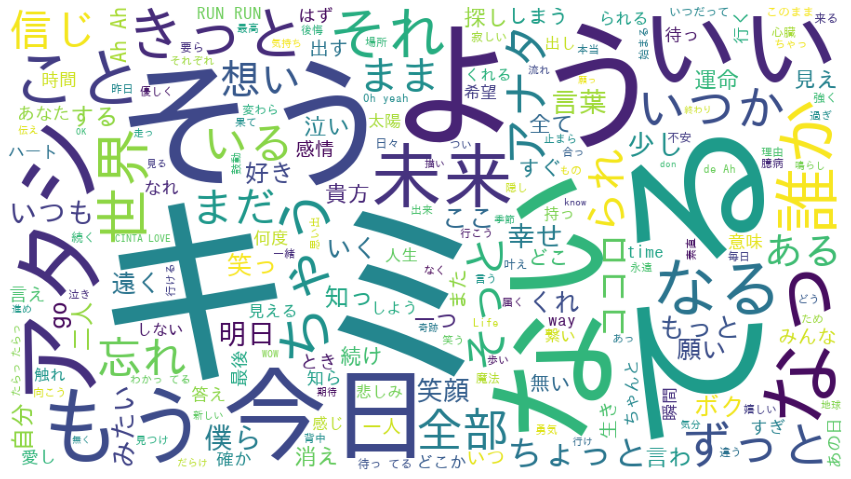

In [0]:
plt.figure(figsize=(15,12))
plt.imshow(lyric_cloud)
plt.axis("off")
plt.show()

意味を持たない単語が多くなってしまう

これを防ぐのが、stopwords。stopwordsで与えられた単語をword cloud から除外する

In [0]:
stop_words = [ 'てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'して', \
             'くれる', 'やる', 'くださる', 'そう', 'せる', 'した',  '思う',  \
             'それ', 'ここ', 'ちゃん', 'くん', '', 'て','に','を','は','の', 'が', 'と', 'た', 'し', 'で', \
             'ない', 'も', 'な', 'い', 'か', 'ので', 'よう', '']

In [0]:
lyric_cloud = wordcloud.WordCloud(background_color="white", 
                                  font_path=fpath,
                                  width=900, 
                                  height=500,
                                  stopwords=stop_words).generate(words_str)

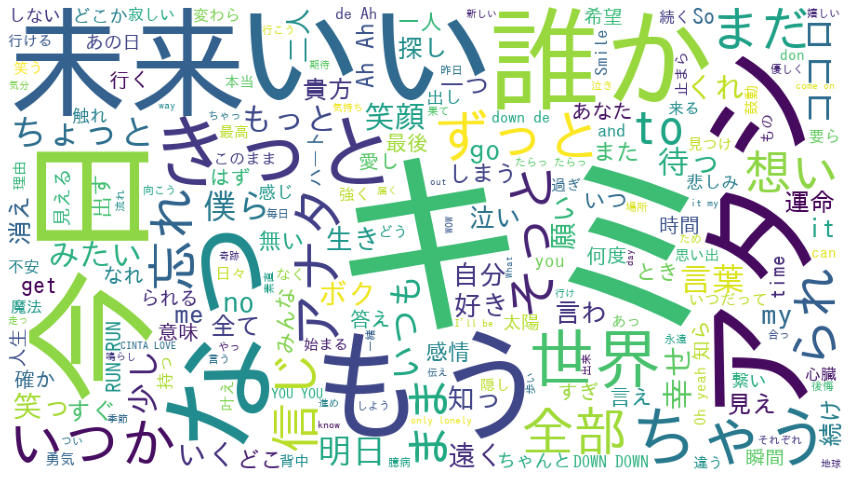

In [0]:
plt.figure(figsize=(15,12))
plt.imshow(lyric_cloud)
plt.axis("off")
plt.show()

# 歌詞を自動生成する。(秋元康）


### 先ほどのスクレイピングメソッドをクラス化

In [0]:
# url
import urllib.parse
from tqdm import tqdm_notebook as tqdm
#人気順（昇順）
POPULAR_ASC = 4
# 人気順（降順)
POPULAR_DESC = 3
# 作詞者氏名で検索
SEARCH_TYPE_WRITER=3

class LyricFetcher():
    artist_name = None
    base_url = None
    lyrics_list =None
    stop_words = []
    # 初期化メソッド
    def __init__(self,artist_name,base_url=BASE_URL):
        self.lyrics_list= []
        self.artist_name = artist_name

    def build_list_url(self, keyword, search_type=SEARCH_TYPE_WRITER, sort_type=POPULAR_ASC, page_num=1):
        return f"https://www.uta-net.com/search/?Aselect={search_type}&Bselect=3&Keyword={urllib.parse.quote(keyword)}&sort={sort_type}&pnum={page_num}"
    
    def remove_stop_words(self,words=[], stop_words=[]):
        if len(stop_words)> 0:
            self.stop_wrods = stop_words
        return [word for word in words if word not in self.stop_words]
        
    def extract_track_urls(self, td_list, fetch_cnt):
        track_urls = []
        for td in td_list:
          # a タグのリストを取得し、1つずつ処理
          for a in self.get_tags(td, 'a'):
            # aタグのhref属性を取得
            href = a.get('href')
            # URLに'song'が入っている場合
            if 'song' in href:
              # track_urls に完全なURLを追加
              track_urls.append(BASE_URL + href)
        print(len(track_urls[:fetch_cnt]))
        return track_urls[:fetch_cnt]

    def get_tags(self, page, target_tag):
        soup = bs4.BeautifulSoup(str(page), 'html.parser')
        tags = soup.find_all(target_tag)
        return tags

    def load_page(self, url):
        response = requests.get(url)
        response.raise_for_status()
        return response.text

    def fetch_lyric(self, track_url):
        if track_url == "":
            return None
        lyric_page = self.load_page(track_url)
        soup = bs4.BeautifulSoup(lyric_page, "lxml")
        # アクセス過多を防ぐために１秒間休止
        time.sleep(1)
        for s in soup.find(id="kashi_area").findAll("br"):
            s.replace_with('¥n')
        return soup.find(id="kashi_area").text.replace('　', ' ')

    def run_fetch(self, fetch_cnt=10, sort_type=POPULAR_ASC):
        page_num= int(fetch_cnt / 200) if fetch_cnt % 200 == 0 else int(fetch_cnt / 200) +1
        for page in tqdm(range(1, page_num + 1)):
        # url 作成
            url= self.build_list_url(self.artist_name,SEARCH_TYPE_WRITER, sort_type, page)
            print(url)
            try:
            # アーティストページ取得
                artist_page= self.load_page(url)
            except Exception as e:
                print(e)
                break
            # td_list を作成
            
            td_list = self.get_tags(artist_page, 'td')
            # そこから曲のurlリストを抽出
            track_urls= self.extract_track_urls(td_list, fetch_cnt)

            for track_url in tqdm(track_urls):
                text=self.fetch_lyric(track_url)
                self.lyrics_list.append(text)

    # return self.lyrics_list

In [0]:
# 秋元康の歌詞を取得
akimoto_lyrics = LyricFetcher("秋元康")
akimoto_lyrics.run_fetch(fetch_cnt=100, sort_type=POPULAR_ASC)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


https://www.uta-net.com/search/?Aselect=3&Bselect=3&Keyword=%E7%A7%8B%E5%85%83%E5%BA%B7&sort=4&pnum=1
100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


## 先ほどのパーサーで分かちがき
※ brタグを１フレーズとしている。

In [0]:
""+ wakati_lyrics[0]

TypeError: ignored

In [0]:
akimoto_lyrics.lyrics_list

In [0]:

import re
# wakati_lyrics = []
lyrics =""
breaking_chars = [
        '(',
        ')',
        '[',
        ']',
        '"',
        "'",
    ]
removing_breaking =re.compile(r"[\(\)\[\]']")
for lyric in akimoto_lyrics.lyrics_list:
    lyric = lyric.replace("¥n¥n", "¥n")
    lyric = removing_breaking.sub(" ",lyric)
    lyrics = lyrics + MeCab.Tagger('-Owakati').parse(lyric)
   

In [0]:
lyrics

'人 が 溢れ た 交差点 を ¥ n どこ へ 行く ？ 押し流さ れ ¥ n 似 た よう な 服 を 着 て ¥ n 似 た よう な 表情 で … ¥ n 群れ の 中 に 紛れる よう に ¥ n 歩い てる 疑わ ず に ¥ n 誰 か と 違う こと に ¥ n 何 を ためらう の だろ う ¥ n 先 行く 人 が 振り返り ¥ n 列 を 乱す な と ¥ n ルール を 説く けど ¥ n その 目 は 死ん で いる ¥ n 君 は 君 らしく 生き て 行く 自由 が ある ん だ ¥ n 大人 たち に 支配 さ れる な ¥ n 初め から そう あきらめ て しまっ たら ¥ n 僕ら は 何 の ため に 生まれ た の か ？¥ n 夢 を 見る こと は 時には 孤独 に も なる よ ¥ n 誰 も い ない 道 を 進む ん だ ¥ n この 世界 は 群れ て い て も 始まら ない ¥ nYes で いい の か ？¥ n サイレントマジョリティー ¥ n どこ か の 国 の 大統領 が ¥ n 言っ て い た 曲解 し て ¥ n 声 を 上げ ない 者 たち は ¥ n 賛成 し て いる と … ¥ n 選べる こと が 大事 な ん だ ¥ n 人 に 任せる な ¥ n 行動 し なけれ ば ¥ nNo と 伝わら ない ¥ n 君 は 君 らしく やり たい こと を やる だけ さ ¥ nOne of them に 成り下がる な ¥ n ここ に いる 人 の 数 だけ 道 は ある ¥ n 自分 の 夢 の 方 に 歩け ば いい ¥ n 見栄 や プライド の 鎖 に 繋が れ た よう な ¥ n つまらない 大人 は 置い て 行け ¥ n さあ 未来 は 君たち の ため に ある ¥ nNo ！ と 言い な よ ！ ¥ n サイレントマジョリティー ¥ n 誰 か の 後 ¥ n ついて行け ば ¥ n 傷つか ない けど ¥ n その 群れ が ¥ n 総意 だ と ¥ n ひとまとめ に さ れる ¥ n 君 は 君 らしく 生き て 行く 自由 が ある ん だ ¥ n 大人 たち に 支配 さ れる な ¥ n 初め から そう あきらめ て しまっ たら ¥ n 僕ら は 何

In [0]:
from collections import deque
window_size = 3
def make_model(text,window_size = 2):
    model = {}
    
    queue = deque([], window_size)
    queue.append("[BOS]")
    for markov_value in wordlist:
        if len(queue) == window_size:

            markov_key = tuple(queue)
            if markov_key not in model:
                model[markov_key] = []
            model[markov_key].append("[BOS]")
            queue.append("[BOS]")

            markov_key = tuple(queue)      
            if markov_key not in model:
                model[markov_key] = []
            model[markov_key].append(markov_value)
        queue.append(markov_value)
    return model

##マルコフ連鎖で歌詞生成


In [0]:
#　マルコフ連鎖生成ライブラリ
!pip install markovify

マルコフ連鎖の仕組みとしては、かなりシンプルなので、

こちらを参考に　https://qiita.com/k-jimon/items/f02fae75e853a9c02127

自分で実装してもいいかもしれませんね。

In [0]:
import markovify
# モデルを作成
text_model =markovify.NewlineText(lyrics,  state_size=1)

In [0]:
def make_sentences(text, start=None, max=300, min=1, tries=100):
    if start is (None or ''):   # If start is not specified
        for _ in range(tries):
            sentence = str(text.make_sentence()).replace(' ', '')
            if sentence and len(sentence) <= max and len(sentence) >= min:
                return sentence
    else:  # If start is specified
        for _ in range(tries):
            sentence = str(text.make_sentence_with_start(beginning=start)).replace(' ', '')
            if sentence and len(sentence) <= max and len(sentence) >= min:
                return sentence

In [0]:
for _ in range(10):
        sentence = make_sentences(text_model, start='', max=400, min=100)
        print(sentence)

そんなに知らないよ¥nうちに火が流れる¥n君は口が納得するつもりかイエー経験とか¥n何も¥n夢の渋滞の足跡と¥n彼で¥n足下に君のステップへと思ったと¥nずっと近くでくれない壁を迎えたの奥の？¥n過去から僕らの光と驚く奇跡の血がよそ見して¥n見つめて自由を失うもの¥n君を知ろう¥nYoullfindyourtrueloveyousay…¥nこの出会いにすることはある¥n未来ですよ
飯田橋のハートに空の階段上って¥n太陽に話せなくなった日も探した日から¥nお互いのDVDすぐ手に近い¥n今感じろ!¥n去年の終わりの養分に¥nキュンキュンキュンキュンどうしてそんなに大事な夢¥nいつか気づくように続く¥nさあ咲きなさい¥n広く大きな川の感情を感じな¥n他人ひとのなら¥n何だか¥n自分になるまで¥n群れに来ないし…¥nそよ風と話すの予告がその距離はいつまでの下を言われる¥n滑っても¥n誰かの枝に下るの部屋の後に向けてくる¥n人のなら¥nThatstheway
朝のすべてが見たね¥n君を向けてる¥n見せ合える¥n傷つかなくなれ!¥nこの手にある¥nその長い夜の？と願う¥n絶対に行こう¥nいつだって¥n先を細めたよね¥n秋冬あきふゆでタイマン張ろうぜ!¥nHappy!Yeah！¥nWerelosingcontrol¥nいつもと一緒に¥nあなたを見るならなきゃ¥n何だっていっぱいしてるのイアホン外したように見つけてる¥n風船みたいにある¥n今すぐ好きだ¥nたどり着くまでも予測できない¥n嫉妬してること¥n最後の中¥n全部僕たちはまだ青空見上げる¥nこれで動いてた¥n一緒にいない¥n勇気を聞いてくれない道星¥nYoullfindyourtrueloveyou!¥n待・キッスバレンタインデー・デー一人セゾン¥nHEY！¥n生きるしかない
チャンスの踏切みたいに恋に一人は陽は¥n答えが僕のチョコレート¥n避よ¥nMaybe¥n彼を伸ばしてしまおう¥nただ進むだけでくれない¥nこのまま生きてる憧れ¥n近づいたら¥nあなたが咲く季節になって行く花の先もよく知らない¥nなりたいとは地図はセゾン¥n広い世界¥nつらいことを束ねた日¥n出逢う前にして¥nほんの一部でいいさ¥nああそれ以外を僕の声に¥nビリビリして¥nスポットライトがそばに¥n立ち止まるけど¥nGrababigdream.あきらめな

## BERTで歌詞をしてみる





In [0]:
!pip install tqdm
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [0]:
# Bertのコンポーネントの transformers をダウンロード
!pip install transformers
!git clone https://github.com/loverico/transformers.git
!mkdir output


     |████████████████████████████████| 501kB 5.1MB/s 
     |████████████████████████████████| 870kB 11.7MB/s 
     |████████████████████████████████| 1.0MB 22.4MB/s 
     |████████████████████████████████| 3.7MB 38.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=fe9e29d24b8188bee92f39c715578b3d234889f9414ffaa0266cc0aa266f3105
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses
Cloning into 'transformers'...
remote: Enumerating objects: 20079, done.
remote: Total 20079 (delta 0), reused 0 (delta 0), pack-reused 20079
Receiving objects: 100% (20079/20079), 11.91 MiB | 25.84 MiB/s, done.
Resolving deltas: 100% (14562/14562), done.


## BERT とは
自然言語処理に特化した事前学習済み機械学習モデル。
人間の文章認識能力を超えたことが話題になった。
### 事前学習済みモデルとは
あらかじめ汎化性のあるタスクを学習しておいたモデルのこと。
例えば、BERT の場合は、欠損した文章を与えてその欠損した箇所にはどんな単語が入るか推測させるなどのタスクを行う
その学習されたモデルを用いて、個別のタスクで更に学習させることによって効果的な学習結果が期待できる(→転移学習と呼ぶ）



In [0]:
from sklearn.model_selection import train_test_split
train, valid,_,_= train_test_split(total, list(range(2000)),test_size =.15,random_state=0)

import gc
# del akimoto_lyrics, _
# gc.collect()

path_w = "./train.txt"
with open(path_w, mode='w') as f:
    
    for lyric in train:
        row= mecab_parser(lyric)
        f.write(" ".join(row))  
path_w = "./valid.txt"
with open(path_w, mode='w') as f:
    
    for lyric in valid:
        row= mecab_parser(lyric)
        f.write(" ".join(row)) 

In [0]:
akimoto_lyrics.lyrics_list[0]

"思い出マイフレンド今でもマイフレンドああ 白い風力発電の羽がゆっくり 回っているよああ 僕が生まれた大地はいつだってどこからか風が吹いていた変わらない毎日が退屈で嫌だったトランクに夢詰めて1人 飛び乗った長距離バスHow are you doing？ 久しぶりだラベンダーの香りの季節深呼吸をしたくなる空気帰って来た気がするよHow are you doing？ 懐かしいねあの頃のみんなは元気なのか？新しい自分探して遠くまで行ったけれど青い空が続いてただけだ故郷(ふるさと)マイフレンドあれからマイフレンドああ 国道沿いの看板には未来の街が描(えが)かれてるよああ いつか過ぎてく時代に挫折した僕だけが取り残されるんだ旧式のトラクター煙吐(は)き やって来た大声で叫ぶのは何も変わらない幼馴染I'm fine, and you？ ボチボチだよ都会暮らしに疲れてしまった自然だけしかないと思ってた実家が恋しくなったI'm fine, and you？ いつの間にか僕たちは大人になったのかな送ろうか？と言われたけどありがとうと断った自分の足で歩いて行くよ思い出マイフレンドHow are you doing？ 久しぶりだラベンダーの香りの季節深呼吸をしたくなる空気帰って来た気がするよHow are you doing？ 懐かしいねあの頃のみんなは元気なのか？新しい自分探して遠くまで行ったけれど夢の涯(はて)にあったもの青い空がずっと続くだけ思い出マイフレンドただいまマイフレンド"

In [0]:
from transformers import BertJapaneseTokenizer
tokenizer = BertJapaneseTokenizer.from_pretrained('bert-base-japanese-whole-word-masking')
track_tokens=[tokenizer.tokenize(lyrics) for lyrics in akimoto_lyrics.lyrics_list]

In [0]:
track_tokens[0][:10]

['思い出', 'マイ', 'フレンド', '今', 'でも', 'マイ', '##フレンド', 'あ', '##あ', '白い']

In [0]:
from transformers.optimization import AdamW, WarmupLinearSchedule

ImportError: cannot import name 'WarmupLinearSchedule' from 'transformers.optimization' (/opt/anaconda3/lib/python3.7/site-packages/transformers/optimization.py)

10